In [1]:
import pandas as pd # needed for most operation
import numpy as np # needed for some array operations
from sklearn.model_selection import train_test_split
import pickle
pd.__version__

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance


In [2]:
data = pd.read_pickle("../data/IterImput")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data.head()


,Treatment,Fever,Duration_of_pain,Sick_leave,Earlier_hospitalization,Familiy_history,Depression,Extremely_nervous,Stress,Irrational_thoughts_risk_lasting,Irrational_thoughts_work,Coping_strategy,Kinesiophobia_physical_exercise,Kinesiophobia_pain_stop,Age,Uses_analgesics,Uses_corticosteroids,Serious_disease,Neurogenic_signals,Continuous_pain,Decreased_mobility,Nocturnal_pain,Weightloss_per_year,Loss_muscle_strength,Failure_symptoms,Incoordination,neck_pain_intensity,low_back_pain_intensity,arm_left_pain_intensity,arm_right_pain_intensity,leg_left_pain_intensity,leg_right_pain_intensity,Paidwork
0,1.0,1.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,10.0,0.0,7.0,7.0,7.0,0.0,1.0,1.0,1.0,1.0,45.0,1.0,3.0,1.0,1.0,0.902839,0.0,8.0,8.0,7.0,6.0,6.0,0.0
1,3.0,1.0,10.0,0.0,1.0,1.0,0.0,0.0,1.0,5.0,0.0,7.0,10.0,10.0,5.0,1.0,1.0,1.0,1.0,1.0,32.0,1.0,2.0,1.0,1.0,1.000000,7.0,8.0,7.0,4.0,0.0,0.0,1.0
2,1.0,1.0,10.0,0.0,1.0,0.0,0.0,6.0,1.0,8.0,8.0,2.0,7.0,7.0,5.0,0.0,1.0,1.0,1.0,1.0,30.0,0.0,4.0,0.0,1.0,0.000000,3.0,5.0,0.0,2.0,0.0,3.0,0.0
3,5.0,1.0,10.0,0.0,1.0,0.0,0.0,1.0,1.0,10.0,3.0,1.0,10.0,10.0,5.0,0.0,1.0,1.0,1.0,1.0,53.0,1.0,4.0,1.0,0.0,0.969348,2.0,9.0,0.0,0.0,9.0,5.0,0.0
4,1.0,1.0,10.0,0.0,1.0,0.0,0.0,0.0,1.0,7.0,10.0,7.0,7.0,9.0,5.0,0.0,1.0,1.0,1.0,1.0,28.0,1.0,2.0,0.0,1.0,0.435946,0.0,7.0,5.0,0.0,0.0,0.0,0.0


In [3]:
#pd.unique(data['Decreased_mobility'])
dec_mob = pd.cut(data['Decreased_mobility'],bins=[-0.1,10,20,30,40,50,60,70],labels=[1,2,3,4,5,6,7]) #numerical from 0 to 70
data['Decreased_mobility'] = dec_mob
data.head(50)

,Treatment,Fever,Duration_of_pain,Sick_leave,Earlier_hospitalization,Familiy_history,Depression,Extremely_nervous,Stress,Irrational_thoughts_risk_lasting,Irrational_thoughts_work,Coping_strategy,Kinesiophobia_physical_exercise,Kinesiophobia_pain_stop,Age,Uses_analgesics,Uses_corticosteroids,Serious_disease,Neurogenic_signals,Continuous_pain,Decreased_mobility,Nocturnal_pain,Weightloss_per_year,Loss_muscle_strength,Failure_symptoms,Incoordination,neck_pain_intensity,low_back_pain_intensity,arm_left_pain_intensity,arm_right_pain_intensity,leg_left_pain_intensity,leg_right_pain_intensity,Paidwork
0,1.0,1.0,10.000000,0.0,1.0,0.0,0.0,0.000000,0.0,9.000000,10.000000,0.000000,7.000000,7.000000,7.0,0.0,1.000000,1.0,1.0,1.0,5,1.0,3.0,1.000000,1.0,0.902839,0.0,8.0,8.0,7.0,6.0,6.0,0.0
1,3.0,1.0,10.000000,0.0,1.0,1.0,0.0,0.000000,1.0,5.000000,0.000000,7.000000,10.000000,10.000000,5.0,1.0,1.000000,1.0,1.0,1.0,4,1.0,2.0,1.000000,1.0,1.000000,7.0,8.0,7.0,4.0,0.0,0.0,1.0
2,1.0,1.0,10.000000,0.0,1.0,0.0,0.0,6.000000,1.0,8.000000,8.000000,2.000000,7.000000,7.000000,5.0,0.0,1.000000,1.0,1.0,1.0,3,0.0,4.0,0.000000,1.0,0.000000,3.0,5.0,0.0,2.0,0.0,3.0,0.0
3,5.0,1.0,10.000000,0.0,1.0,0.0,0.0,1.000000,1.0,10.000000,3.000000,1.000000,10.000000,10.000000,5.0,0.0,1.000000,1.0,1.0,1.0,6,1.0,4.0,1.000000,0.0,0.969348,2.0,9.0,0.0,0.0,9.0,5.0,0.0
4,1.0,1.0,10.000000,0.0,1.0,0.0,0.0,0.000000,1.0,7.000000,10.000000,7.000000,7.000000,9.000000,5.0,0.0,1.000000,1.0,1.0,1.0,3,1.0,2.0,0.000000,1.0,0.435946,0.0,7.0,5.0,0.0,0.0,0.0,0.0
5,5.0,1.0,10.000000,0.0,1.0,0.0,0.0,2.000000,1.0,6.000000,7.000000,8.000000,8.000000,9.000000,7.0,0.0,1.000000,1.0,1.0,1.0,3,1.0,4.0,1.000000,1.0,0.000000,0.0,8.0,0.0,0.0,0.0,0.0,0.0
6,5.0,1.0,10.000000,0.0,1.0,0.0,1.0,10.000000,1.0,9.000000,9.000000,2.000000,9.000000,9.000000,3.0,0.0,1.000000,1.0,1.0,1.0,4,1.0,1.0,0.000000,1.0,1.000000,2.0,8.0,0.0,0.0,9.0,0.0,0.0
7,5.0,1.0,10.000000,0.0,1.0,0.0,0.0,3.000000,0.0,10.000000,7.000000,2.000000,6.000000,5.000000,3.0,0.0,1.000000,1.0,1.0,1.0,4,1.0,3.0,1.000000,1.0,0.911908,0.0,8.0,0.0,0.0,3.0,3.0,0.0
8,5.0,1.0,10.000000,0.0,1.0,0.0,0.0,3.000000,1.0,5.000000,0.000000,4.000000,4.000000,10.000000,3.0,0.0,1.000000,1.0,1.0,1.0,4,1.0,1.0,1.000000,1.0,1.000000,0.0,4.0,0.0,0.0,0.0,0.0,0.0
9,5.0,1.0,10.000000,0.0,1.0,0.0,0.0,0.000000,0.0,5.000000,10.000000,5.000000,10.000000,10.000000,8.0,0.0,1.000000,1.0,1.0,1.0,4,1.0,1.0,1.000000,1.0,0.779063,8.0,8.0,0.0,0.0,3.0,0.0,0.0


In [5]:
data.columns
X = data.loc[:, data.columns != 'Treatment']
y = data['Treatment'].astype(int)

#X = data.loc[:, data.columns != 0]
#y = data[0]2
print(y.value_counts())


1    659
5    649
2    160
3     65
Name: Treatment, dtype: int64


1
              precision    recall  f1-score   support

           1       0.52      0.47      0.49       148
           2       0.00      0.00      0.00        31
           3       0.00      0.00      0.00        14
           5       0.42      0.63      0.50       114

    accuracy                           0.46       307
   macro avg       0.23      0.28      0.25       307
weighted avg       0.41      0.46      0.43       307

[[70  0  0 78]
 [15  0  0 16]
 [ 8  0  0  6]
 [42  0  0 72]]


C:\Users\pauco\Documents\ANACONDA\envs\py39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pauco\Documents\ANACONDA\envs\py39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pauco\Documents\ANACONDA\envs\py39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

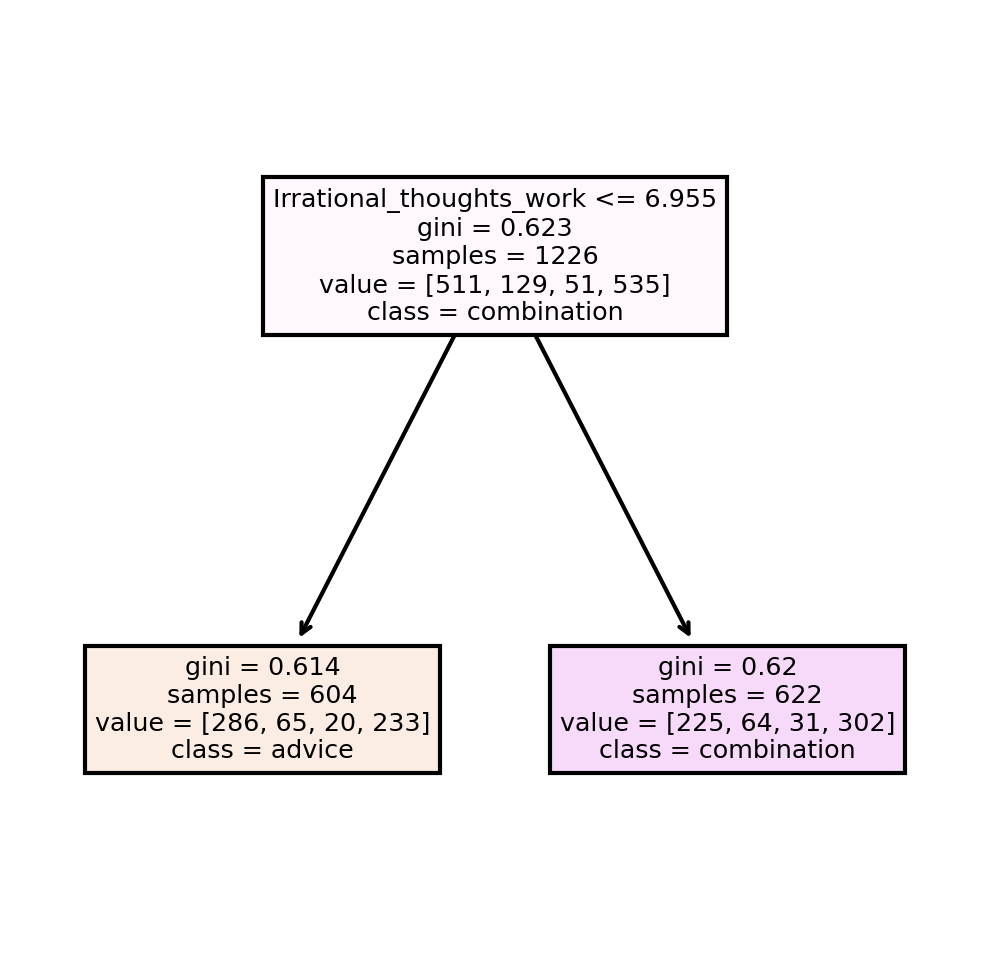

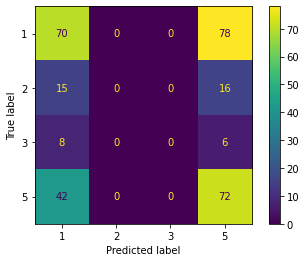

0.46254071661237783


In [17]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_tree = DecisionTreeClassifier(ccp_alpha=0.005) #max_depth=100 #ccp_alpha = 
model_tree = model_tree.fit(X_train, y_train)



#plotting tree
fn=X_test.columns
cn=['advice', 'rehab', 'surgery','combination']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_tree,
               feature_names = fn, 
               class_names=cn,
               filled = True);


#plt.figure(figsize=(30,30)) # set plot size (denoted in inches)
#tree.plot_tree(model_tree, fontsize=30)
#plt.show()
print(model_tree.get_depth())

#AIXO FERHO AMB TRAINING O TEST SET? DESPRES PODEM CROSS VALIDAR
y_predict = model_tree.predict(X_test)
print(classification_report(y_test,y_predict))

#tree_cv = cross_val_score(model_tree,X_train,y=Y_train, cv=10)
#np.mean(tree_cv)

print(confusion_matrix(y_test, y_predict))

ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.show()
#print(classification_report(y_test, y_predict))
#accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)

#importances = model_tree.feature_importances_

print(model_tree.score(X_test,y_test))

Number of nodes in the last tree is: 3 with ccp_alpha: 0.005686089135629624


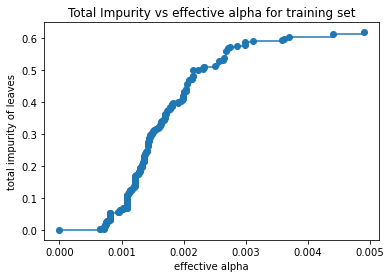

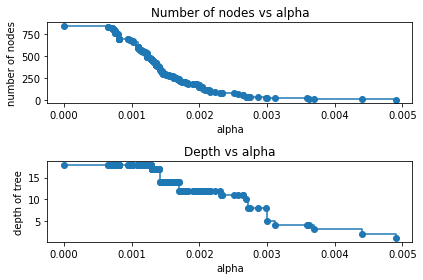

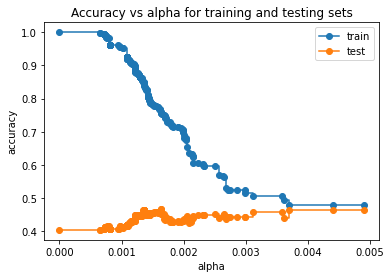

In [18]:
#Cost complexity pruning
path = model_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)


clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

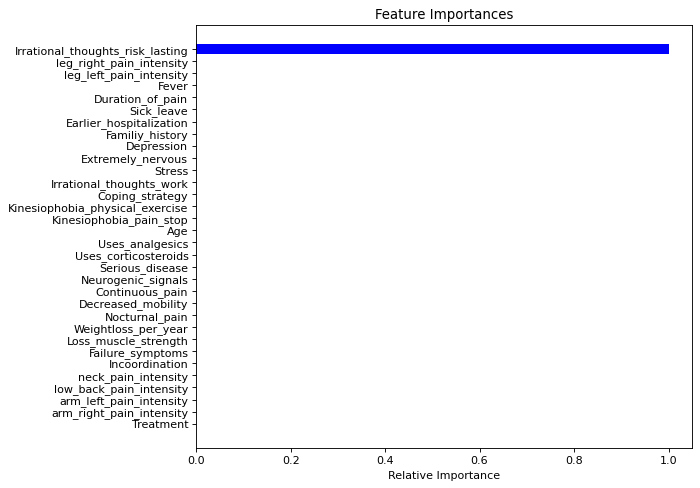

In [19]:
features = data.columns
importances = model_tree.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(8, 7), dpi=80)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.figure
plt.show()


              precision    recall  f1-score   support

           1       0.56      0.46      0.50       148
           2       0.00      0.00      0.00        31
           3       1.00      0.07      0.13        14
           5       0.43      0.69      0.53       114

    accuracy                           0.48       307
   macro avg       0.50      0.31      0.29       307
weighted avg       0.47      0.48      0.45       307

[[68  0  0 80]
 [15  0  0 16]
 [ 4  0  1  9]
 [35  0  0 79]]


C:\Users\pauco\Documents\ANACONDA\envs\py39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pauco\Documents\ANACONDA\envs\py39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pauco\Documents\ANACONDA\envs\py39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

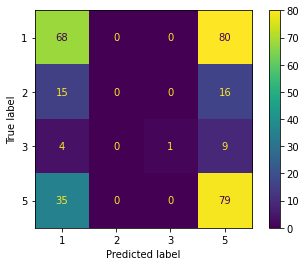

0.4820846905537459


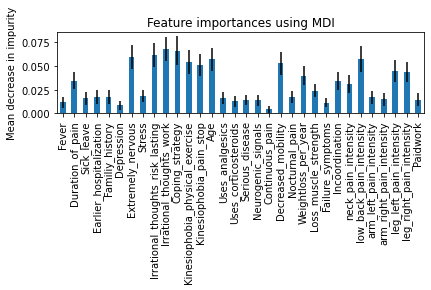

In [27]:
# RANDOM FORESTS + MEAN DECREASE IN IMPURITY FEAT IMPORTANCES

feature_names = [X.columns[i] for i in range(X.shape[1])]

forest = RandomForestClassifier(random_state=0) #DEFAULT 100 TREES
forest.fit(X_train, y_train)
for_importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(for_importances, index=feature_names)

y_predict = forest.predict(X_test)
print(classification_report(y_test,y_predict))

print(confusion_matrix(y_test, y_predict))

ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.show()

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

print(forest.score(X_test,y_test))

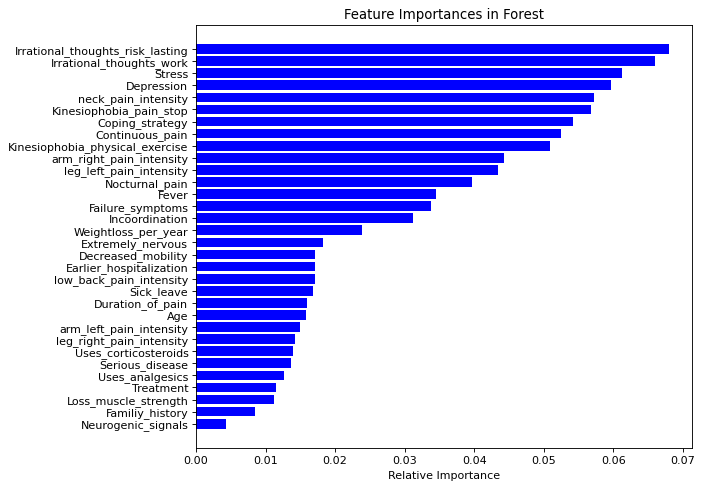

In [28]:
#FEATURE IMPORTANCE MDI FORESTS

features = data.columns
importances = forest.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(8, 7), dpi=80)
plt.title('Feature Importances in Forest')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.figure
plt.show()

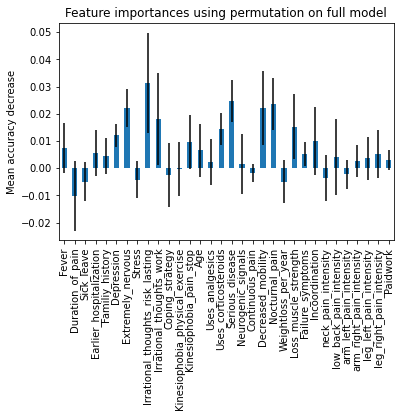

In [171]:
#PERMUTATION IMPORTANCE

result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=feature_names)

ig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

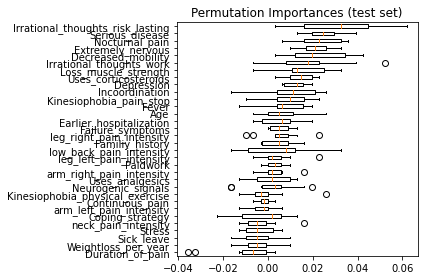

In [33]:
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

sorted_idx = result.importances_mean.argsort()
fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()